In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("Diwali Sales Data.csv", encoding='latin1')
 
print(data.head(10))



   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   
5  1000588       Joni  P00057942      M     26-35   28               1   
6  1001132       Balk  P00018042      F     18-25   25               1   
7  1002092   Shivangi  P00273442      F       55+   61               0   
8  1003224     Kushal  P00205642      M     26-35   35               0   
9  1003650      Ginny  P00031142      F     26-35   26               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1    Andhra Pradesh  Southern      

In [9]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
data.shape # shape is used to check number of rows and columns in data 

(11251, 15)

# here we can seay that amount , status and unnamed coulmn contains null values 

In [ ]:
# as in data we have null values in status and unnameed column and we dont need that we will drop that 
# inplace is used to save this code here when we run aagin no null col will be there

data.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [28]:
print(data.columns)


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [29]:
pd.isnull(data).sum() # we use pandas is null.sum method to check null values in data

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
data.shape

(11251, 13)

In [32]:
data.dropna(inplace=True)# dropna function is used to drop null values 


In [33]:
data.shape # we used data.shape to see actually if null values deleted or not 

(11239, 13)

In [34]:
pd.isnull(data).sum() # just crosschecking if null values deleted or no 


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# now checking count of Gender 

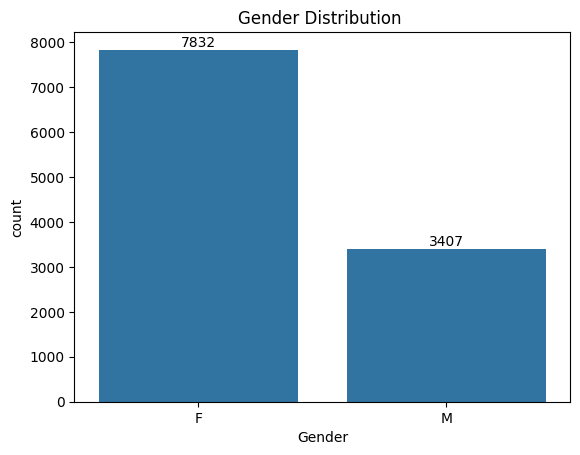

In [43]:
# when we have to give values we use containers 
ax=sns.countplot(data=data,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution ")
plt.show()

# Here we can analyze that females made more purchase compare to male

In [59]:
gp=data.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)


print(gp)


  Gender       Amount
0      F  74335856.43
1      M  31913276.00


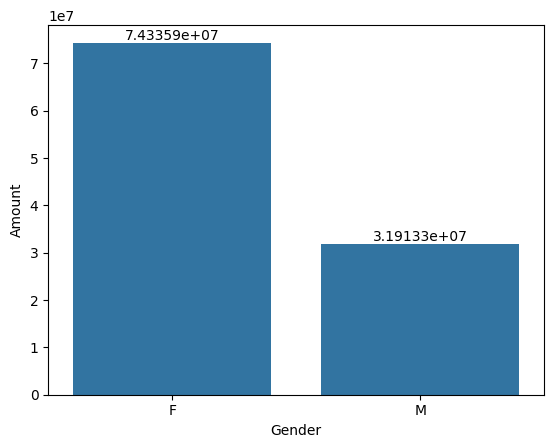

In [79]:
ax=sns.barplot(data=gp,x="Gender",y="Amount")
ax.bar_label(ax.containers[0])
plt.show()

#Analyses on the basis of age 

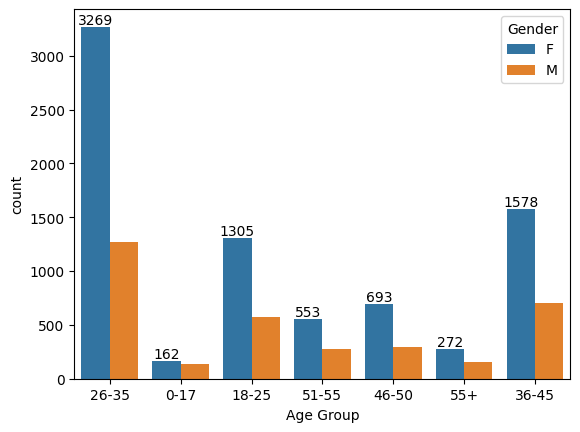

In [64]:
ax=sns.countplot(data=data,x="Age Group",hue="Gender")
ax.bar_label(ax.containers[0])
plt.show()

#now if we have to analyze the impact of stats on order and amount 

In [74]:
#impact of state on orders , here we have to groupby states first 
state_order=data.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
#print(state_order)

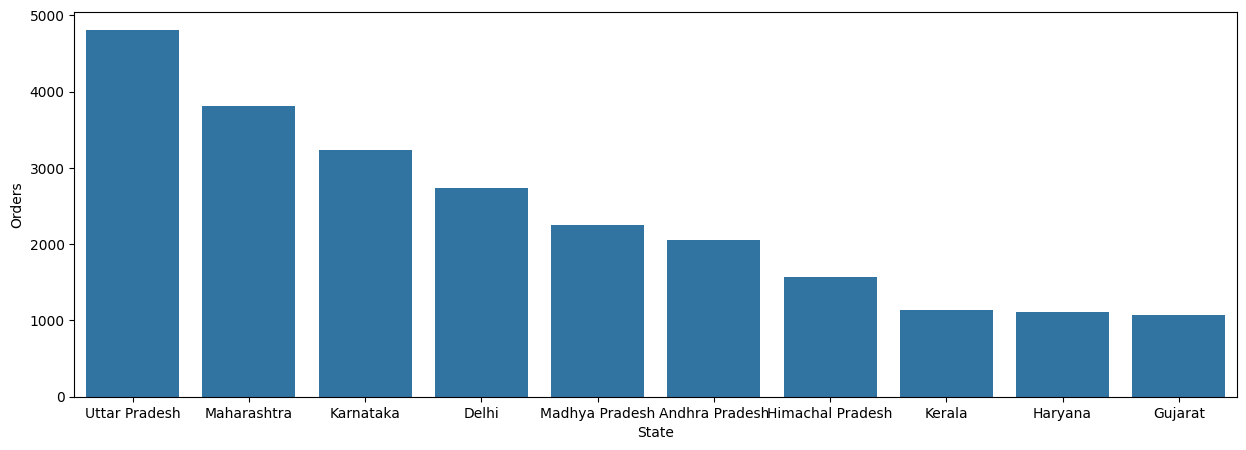

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(data=state_order,x="State",y="Orders")

plt.show()

#from this graph it can be analysed that up and Maharashtra has made higher orders 

In [76]:
# now we will see stsate wise amount spend

state_amount=data.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
#print(state_amount)

               State       Amount
14     Uttar Pradesh  19374968.00
10       Maharashtra  14427543.00
7          Karnataka  13523540.00
2              Delhi  11603819.45
9     Madhya Pradesh   8101142.00
0     Andhra Pradesh   8037146.99
5   Himachal Pradesh   4963368.00
4            Haryana   4220175.00
1              Bihar   4022757.00
3            Gujarat   3946082.00


C:\Users\Karan Ahuja\AppData\Local\Temp\ipykernel_8436\2553366661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=state_amount,x="State",y="Amount",palette="spring")


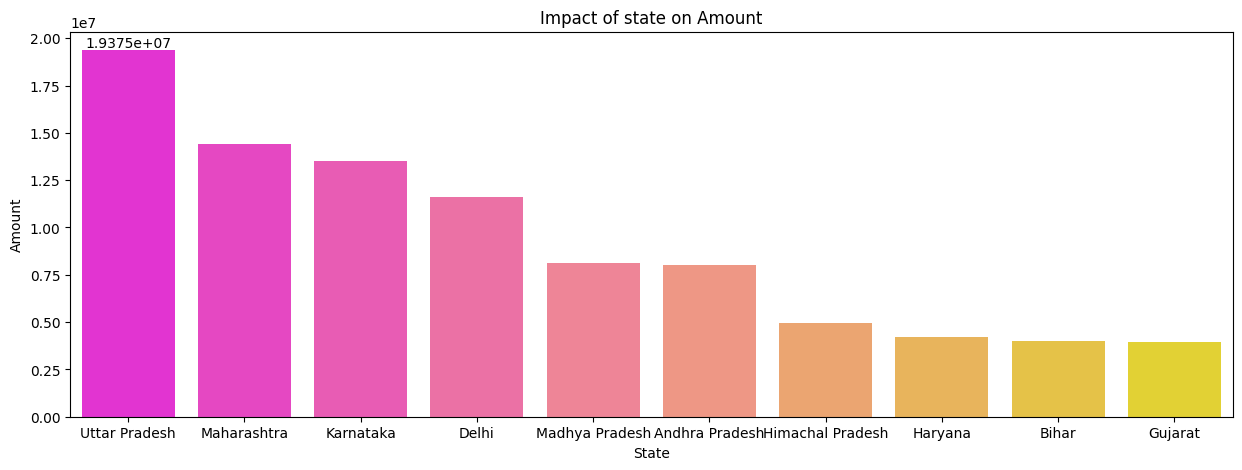

In [88]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=state_amount,x="State",y="Amount",palette="spring")
ax.bar_label(ax.containers[0]),
plt.title("Impact of state on Amount")
plt.show()

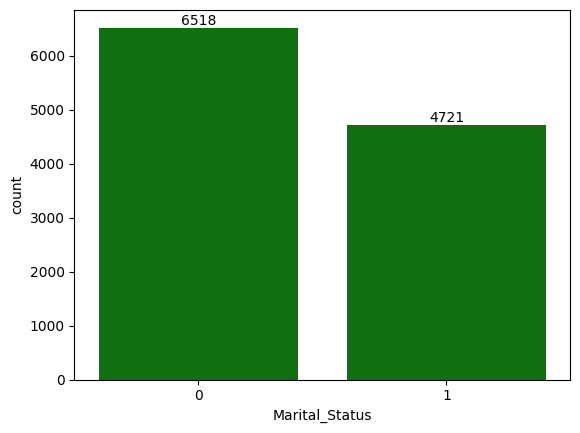

In [92]:
#let's check the impact of marital status on 
ax=sns.countplot(data=data,x="Marital_Status",color="Green")
ax.bar_label(ax.containers[0])

plt.show()

In [96]:
#now if want to see impact of marital status and gender on amount we have to do group by 


Marital_gender=data.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
print(Marital_gender)
                            

   Marital_Status Gender       Amount
0               0      F  43786648.44
2               1      F  30549207.99
1               0      M  18338738.00
3               1      M  13574538.00


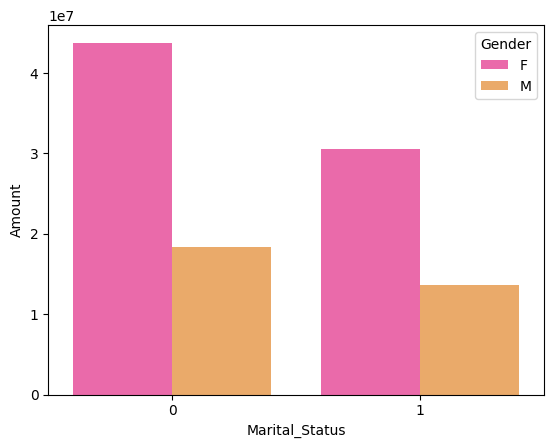

In [98]:
sns.barplot(data=Marital_gender,x="Marital_Status",y="Amount",hue="Gender",palette="spring")
plt.show()

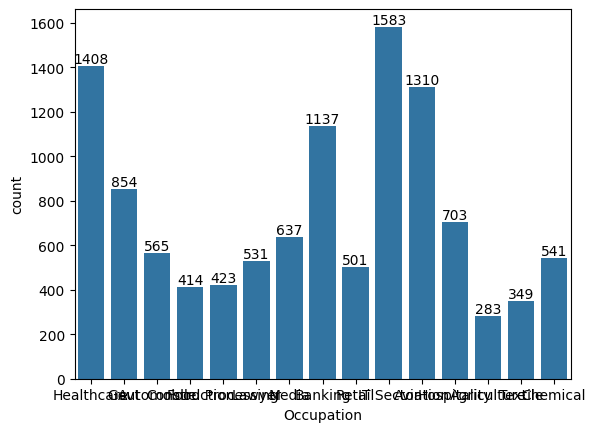

<Figure size 1000x0 with 0 Axes>

In [118]:
# ON THE BASIS OF OCCUPATION 
ax=sns.countplot(data=data,x="Occupation")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(10,0))
plt.show()

In [123]:
occupation_amount=data.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(8)
print(occupation_amount)

     Occupation       Amount
10    IT Sector  14755079.00
8    Healthcare  13034587.49
2      Aviation  12602298.00
3       Banking  10770610.95
7          Govt   8517212.00
9   Hospitality   6376405.00
12        Media   6295832.99
1    Automobile   5368596.00


C:\Users\Karan Ahuja\AppData\Local\Temp\ipykernel_8436\4129323432.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation_amount,x="Occupation",y="Amount",palette="viridis")


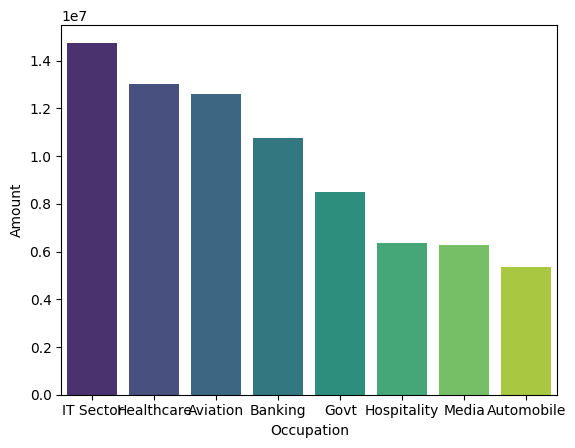

<Figure size 1000x1000 with 0 Axes>

In [126]:
sns.barplot(data=occupation_amount,x="Occupation",y="Amount",palette="viridis")
plt.figure(figsize=(10,10))
plt.show()

#Analysis on the basis of product catagory 

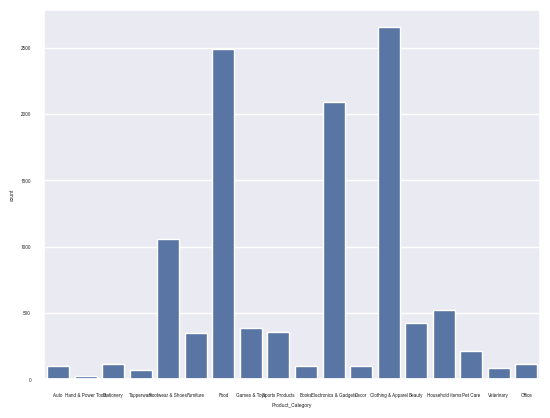

<Figure size 2000x500 with 0 Axes>

In [171]:
sns.countplot(data=data,x="Product_Category")
plt.figure(figsize=(20,5))
sns.set(font_scale=0.30)
plt.show()

In [137]:
Prod_amount=data.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(7)
#print(Prod_amount)

C:\Users\Karan Ahuja\AppData\Local\Temp\ipykernel_8436\1647157077.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=Prod_amount,x="Product_Category",y="Amount",palette="viridis")


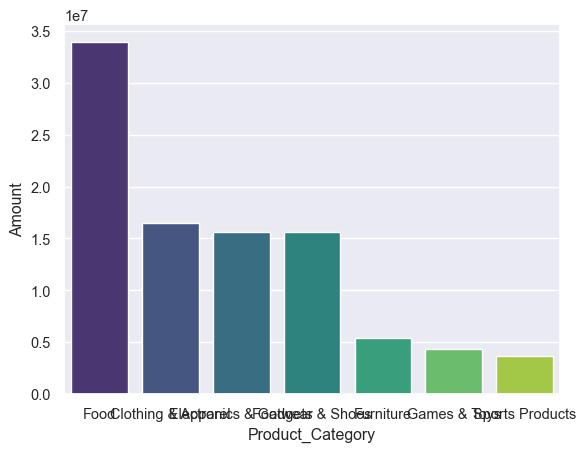

<Figure size 1000x500 with 0 Axes>

In [164]:
ax=sns.barplot(data=Prod_amount,x="Product_Category",y="Amount",palette="viridis")

plt.figure(figsize=(10,5))
sns.set(font_scale=0.95) 
plt.show()